# 머신러닝 이론은 잠시 건너뛰고 무작정 강의 따라하기.

# 1. 데이터 다운로드 및 데이터셋 분류(test & training 분류작업)

In [122]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 라이브러리
import numpy as np
import os

# 플랏 라이브러리

%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림 저장 함수

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout=True, fig_extension= "png", resolution =300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# 쓸모없는 경고 무시하기

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



In [123]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#해당 위치에서 데이터를 작업공간에 만들고 ,파일 다운로드하고 압축풀고 csv파일까지 만들기
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

    

fech_housing_data를 호출하면 현재 작업공간에 datasets/housing 디렉토리를 만들고 housing.tgz파일을 내려받고 압축을 풀어 housoing.csv 파일을 만든다

In [124]:
fetch_housing_data()

In [125]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# 함수 모양으로 봐서는 다운받은 데이터를 판다스로 이용해 데이터프레임을 형식으로 만드는 함수로 보인다 

In [126]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


속성 : 경도 / 위도 / 년식(중위값) / 지역 방 개수 / 침대방 / 인구 / 가정수/ 수입 중간값/ 예측할려는 목표값 / 바다와 근접한지?

In [127]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### value_counts 함수
### 혼자 EDA를 할 때는 몰랐던 함수이다 .unique()로만 개별값을 알 수 있었는데...

In [128]:
housing["ocean_proximity"].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [129]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


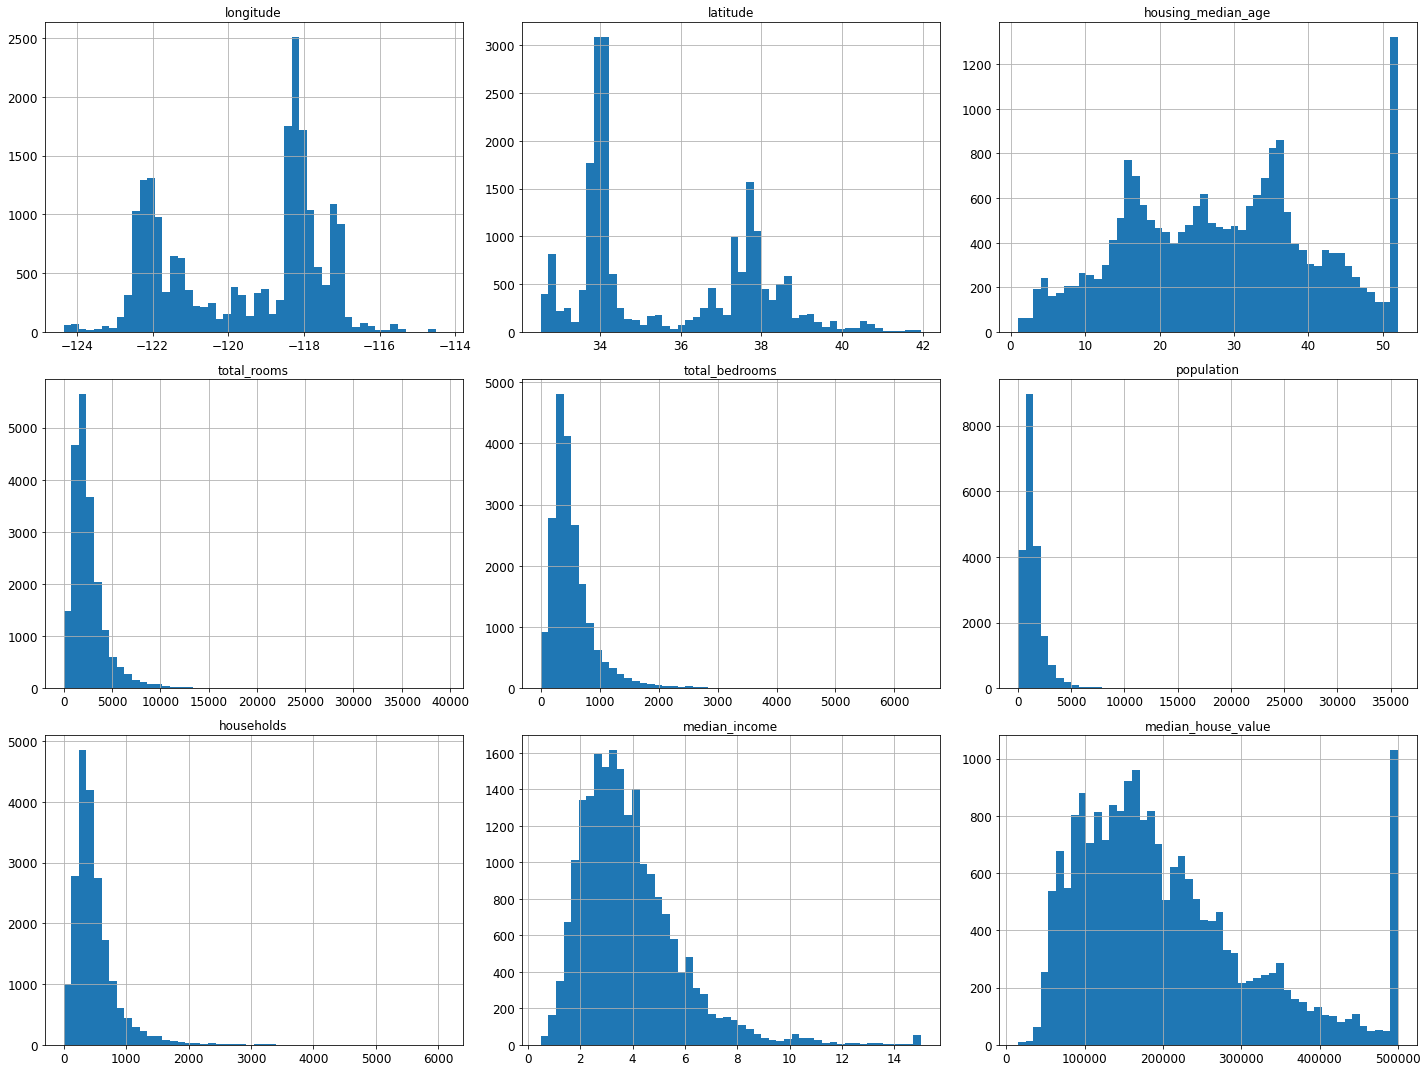

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins =50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [131]:
# median house value, age의 50이상의 값들을 그냥 50으로 간주한 것...
# 이런 이상치는 데이터 만든 사람한테 꼭 물어보자 === 온통대전 데이터도 반드시 물어볼 것!!
# 모델 학습시 문제점이 생길 수 있다.
# 해당하는 값들의 정확한 값을 가져오던지, 아니면 아예 제외시키는 것이 결과적으로 좋을 수 있다.

# 테스트 데이터셋 만들기

좋은 모델을 만들기 위해선 훈련에 사용되지 않고 모델평가만을 위해서 사용될 "테스트 데이터셋"을 따로 구분하는 것이 필요하다. 테스트 데이터셋을 별도로 생성할 수 있지만, 프로젝트 초기의 경우 하나의 데이터셋을 훈련, 테스트용으로 분리하는 것이 일반적이다.

In [132]:
# 다운로드했던 데이터의 일부분을 테스트셋으로 만드는 작업이 필요하다.
np.random.seed(42) 

# 일정한 비율에 대해 테스트데이터셋으로 뽑는 함수

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio) #테스트 비율이 주어지면, 전체의 몇퍼센트에 해당하는 부분을 계산하게 되는데.예를 들어 0.2라면 20%다.
    test_indices = shuffled_indices[:test_set_size] # 인덱스가 셔플된 어레이를 가지고 처음 몇개, 그 나머지 모두를 두 개의 스플릿으로 나눈다.
    train_indices = shuffled_indices[test_set_size:] #20퍼는 테스트 20%는 트레이닝
    return data.iloc[train_indices], data.iloc[test_indices] # 그 인덱스에 속하는 모든 데이터들을 모두 뽑아서 첫번째는 훈련셋, 두번째는 테스트셋으로.

In [133]:
a = np.random.permutation(10)
a

#랜덤값에 10을 주면 그 값이 0부터 9까지 펄뮤테이션, 말그대로 임의로 섞은 리스트를 되돌려주게 된다.

array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])

In [134]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set), len(test_set) # 각각의 셋의 갯수 계산

(16512, 4128)

## 위 방법의 문제점은? = 테스트 데이터를 뽑아내는 작업을 한 번이 아니라 여러번 할 가능성이 있다.
### 예를 들어 샐운 데이터가 들어왔을 때 다시 한 번 트레이닝 나와 테스터로 분류하고 싶을 수도 있다.
### 만약 이 함수를 사용했다면 이전에 테스트한 샘플이 훈련셋으로 갈 수도 있고 섞일 수도 있다.
### 한 번 테스트데이터였다면 계속 테스트데이터로 남길 원한다. ==근데 해당 데이터셋이 바뀌면 바뀔수록 성능이 좋아지는 거 아닌가??흠..

### 해결방안: 각 샘플의 식별자를 사용해서 분할.

In [135]:
from zlib import crc32

def test_set_check(identifier, test_ratio): 
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 

#테스트셋의 비율이 주어졌을때, 해싱함수crc32 사용
# 2의 32승으로 나눈 나머지 값이 2의32승 곱한 값보다 작다면 이것을 테스트데이터에 속한다는 결과를 리턴

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

인덱스를 id로 추가하기

In [136]:
housing_with_id = housing.reset_index() ##몰랐던 함수!!! 데이터셋이 인덱스를 부여한다!! 중요해보임. 해당데이터셋은 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index") #id이름은 인덱스 번호

- 위 방법의 문제점은? = id가 되려면 항상 일정하게 유지해야함, 행번호를 id를 쓰게 되면 나중에 데이터셋이 업데이트되면 뒤에 있던 행들이 올라와서 행번호가 바뀔 수도 있다. 새로운 데이터가 추가되면 반드시 뒤에 추가해야한다.
- id를 만드는 데 안전한 feature들을 사용해야함 : 중복이 덜 생길 수 있는, 가능하면 유니크한
각각의 행이 지역이니까 지리적인 정보를 사용해서 유니크하게 구별할 수 있겠다.
가지고 있는 피쳐(위도,경도)를 합쳐서 새로운 아이디를 만들어보자.

In [137]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [138]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [139]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [140]:
# 이렇게 데이터가 섞이지 않도록 유의해야한다.

### scikit-Learn에서 기본적으로 제공되는 데이터분할 함수, 이것을 이용에 실습에 진행됨

In [141]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2 , random_state = 42)

### 계층적 샘플링(stratified sampling)
- 전체 데이터를 계층(strata)라는 동질의 그룹으로 나눈고, 테스트 테이터가 전체 데이트럴 잘 대표하도록 각 계층에서 올바른 샘플을 추출

<AxesSubplot:>

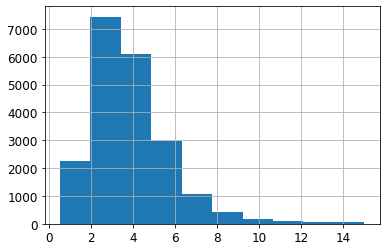

In [142]:
housing["median_income"].hist()

In [143]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5,6., np.inf],
                              labels = [1,2,3,4,5])

# 전체 데이터 있던 한 속성의 값들이 분포가 계층적 샘플링 후에도 그대로 나타나기가 필요할 때가 있다,
# 예를 들어 투표 같은 경우, 전체 남녀 비율이 테스트 데이터에도 똑같이 나타나야 한다.
# 연속값을 이산값으로 바꾸는 과정?

## 잘알아두기 = 온통대전데이터셋에도 써먹을 수 있다.

In [144]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

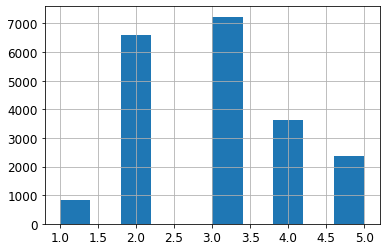

In [145]:
housing["income_cat"].hist()

# 각각의 샘플(bins)에 충분한 갯수가 존재해야한다. 그렇지 않으면 불균형..

In [146]:
from sklearn.model_selection import StratifiedShuffleSplit

In [147]:
split = StratifiedShuffleSplit(n_splits=1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# 이렇게 생성한 데이터셋들이 income_cat의 데이터 분포를 유지하고 있을지가 관건이다.

In [148]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [149]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


In [150]:
housing["income_cat"].value_counts() / len(housing)

# 전체데이터에서의 비율

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [151]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

#### 정확하게 일치하지 않지 않지만 근사치임을 알 수 있다.

In [152]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall" : income_cat_proportions(housing),
    "Stratified" : income_cat_proportions(strat_test_set),
    "Random" : income_cat_proportions(test_set),
}).sort_index()

#### 랜덤하게 샘플할 때랑 아닐때를 비교해주는 함수..근데 오류가 난다.  compare_props라는 데이터프레임은 만들어지는데, Rand. %error" 변수가 추가가 되지 않는다.

In [202]:
compare_props

,Overall,Stratified,Random
1,0.039826,0.039971,0.040213
2,0.318847,0.318798,0.324370
3,0.350581,0.350533,0.358527
4,0.176308,0.176357,0.167393
5,0.114438,0.114341,0.109496


In [204]:
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] -100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [156]:
# 원래 상태로 되돌림
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


# 2. 데이터 이해를 위한 탐색과 시각화

In [157]:
# 데이터 복사본 만들기(훈련데이터를 손상시키지 않기 위해)
housing = strat_train_set.copy()

#### 지리적 데이터 시각화

Saving figure bad_visualization_plot


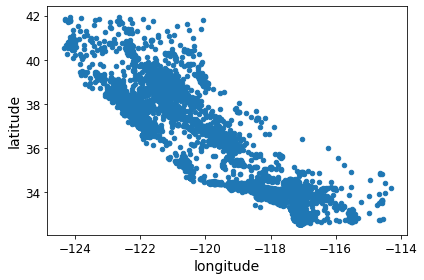

In [158]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

# 경도와 위도를 사용해 가장 간단한 곳 플랏
# 특별한 패턴을 찾기는 어려워 보인다.

#### 밀집된 영역 표시

- alpha옵션 = 밀집된 곳은 좀더 진하게!!
# @이것도 알아두면 좋다.@


Saving figure better_visualization_plot


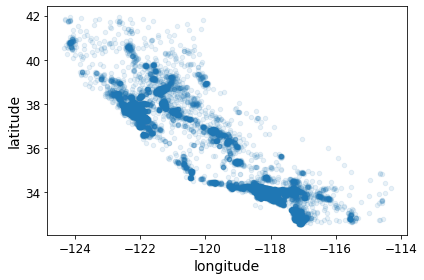

In [159]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

더 다양한 조건을 표시해보자. 
- s : 원의 반지름 ==> 인구
- c : 색상 ==>가격

Saving figure housing_prices_scatterplot


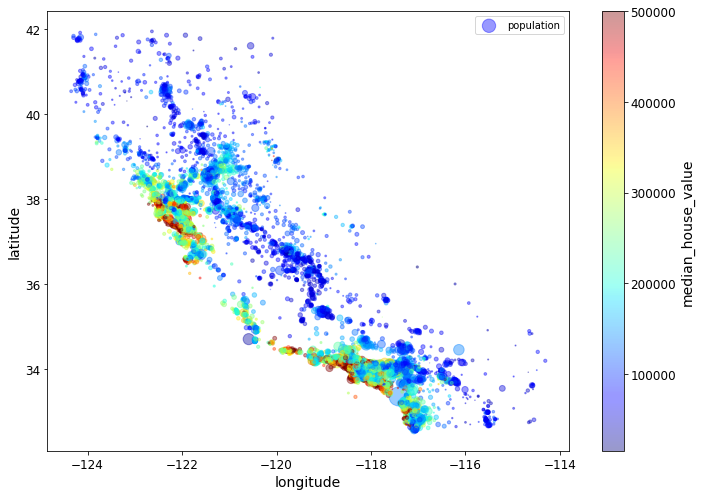

In [160]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7), # 원의 반지름 => 인구
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, # 색상 => 가격
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [161]:
# 집값이 높을 수록 붉은 색, 낮을 수록 파란색의 분포를 보인다.

# 대도시, 바닷기일수록 집값이 비싸다.
# 바다와 멀리 떨어져있음에도 불구하고 주벼노다 집값이 비싼데, 주도시가 있어서 비쌈

#### 지도위에 데이터 표시하기

/var/folders/r8/hnw1hjlx54z7_g14njp906m00000gp/T/ipykernel_34883/4188737692.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


Saving figure california_housing_prices_plot


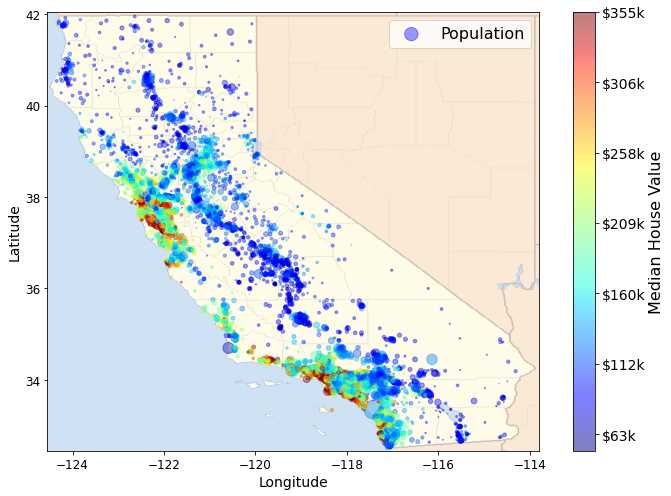

In [162]:
# 강의 내용 이미지 다운 받기

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/"
# 깃주소 : https://github.com/ageron/handson-ml2/blob/master/images/end_to_end_project/california.png

filename = "california.png"

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()


# 3. 상관관계(Correlations) 관찰하기

In [163]:
corr_matrix = housing.corr()

In [164]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [165]:
# 상관관계는 -1과 1사이 범위를 가진다. 1에 가까울 수록 강한 상관관계를 가진다.
# 상관관계가 가장 높은 피쳐는 수입와 가장 밀접한 관련이 있음을 알 수 있다.

Saving figure scatter_matrix_plot


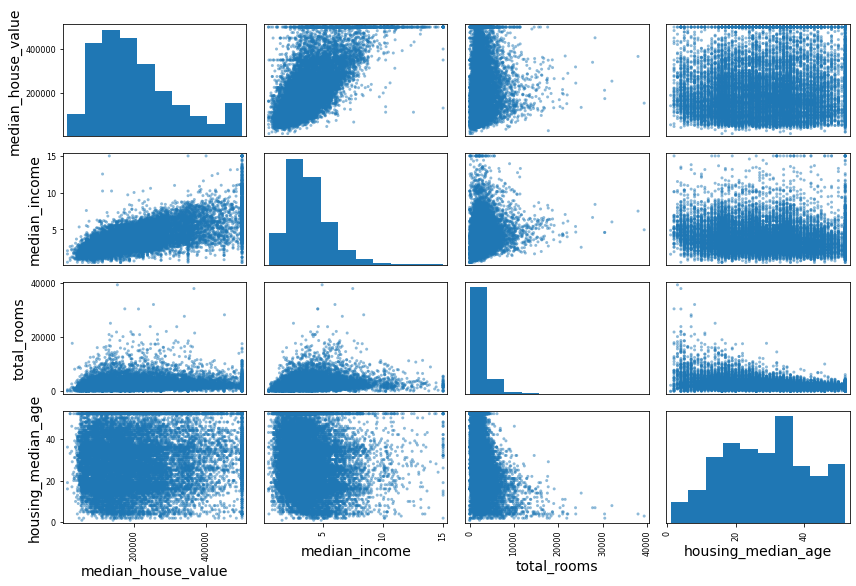

In [166]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

# 특성 몇 개만 살펴봄 
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [167]:
# 상관관계가 높다면 선형적인 모습을 보인다. 당연한 얘기..

Saving figure income_vs_house_value_scatterplot


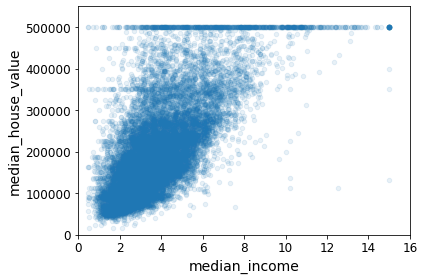

In [168]:
# 소득과 하우스밸류에 대해 확대해서 보자
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

수평적인 관측값들이 보인다. 50만불에 해당하는 선들이 직선을 이루고 있는데, 50만 이상의 값들은 모두다 50만 이상으로 취급했기 때문이다.
마창가지러 30~40불 간격에서도 희미하게 보이는 것을 알 수 있다.
가능하면 비정삭으로 보이는 관측값들은 트레이닝데이터에서 제거시켜주는 것이 모델학습에 도움이 된다.

#### 특성 조합들 실험
- 여러 특성(feature,attribute)들의 조합으로 새로운 특성을 정의해볼 수 있따.
- 예를 들면 가구당 방 개수 침대방의 비율, 가구당 인원

In [169]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [170]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

위에서 관찰할 수 있는 사실들?
- rooms_per_household
- bedrooms per room
같은 경우에는 하나의 집에서 침실이 차지하는 비율인데 집이 당연히 크면 클수록 침실로 쓸 방들은 제한이 되고, 다른 방들의 비율이 더 늘어날 것이다.
인구수도 가구당 인구수라는 새로운 피쳐를 만드는게 좋아보인다.
## "비율"로 새로운 변수를 만드는 것이 중요해보인다.

In [199]:
# 데이터 탐색 과정은 대부분 한 번으로 끝나지 않고 모델을 만들고 문제점을 분석한 뒤 다시 실행하게 된다.

### 머신러닝 알고리즘을 위한 데이터 준비
데이터 준비는 데이터 변환 과정으로 볼 수 있다.
수동변환 vs 자동(함수만들어서)

함수를 사용하면 좋은점...

- 새로운 데이터에 대한 변환을 손쉽게 재생산(reproduce)할 수 있다.
- 향후에 재사용(reuse)할 수 있는 라이브러리를 구축할 수 있다.
- 실제 시스템에 가공되지 않은 데이터(raw data)를 알고리즘에 쉽게 입력으로 사용할 수 있도록 해준다.
- 여러 데이터 변환 방법을 쉽게 시도해 볼 수 있다.


In [172]:
# 목표값을 따로 뺴서 레이블즈라는 데이터프레임으로 따로 저정한다 = 가공할 이유가 없기 때문이다.

housing = strat_train_set.drop("median_house_value", axis=1) # 훈련셋을 위해 제거한다.
housing_labels = strat_train_set["median_house_value"].copy()


# 4. 데이터 정제(Data Cleaning)

 

누락된 특성(missing values) 다루는 방법들 ,,,앞에서 info()를 통해 'total_bedrooms' 특성만이 결측치가 존재했음을 알 수 있었다.!!

- 해당 구역 제거 (행 제거)
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

- 해당 특성 제거 (열 제거)
sample_incomplete_rows.drop("total_bedrooms", axis=1)   

- 임의의 값으로 채움 (0, 평균, 중간값 등)

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

In [173]:
housing.isnull().any(axis=1) #결측치 홧인

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Length: 16512, dtype: bool

In [174]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() ##True인 값들만 모아서 head만 일단 저장
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


대부분은 값을 채워놓거나 보전한다. 데이터 하나 하나 중요하니까 전체를 날린다면 손해니까..
위와 같은 과정역시 사이킷런에서 아래 클래스로 제공한다!

#### Simplelmputer 사용하기


In [175]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

위 같은 경우는 strategy를 median으로 설정해 null 값인 부분에 중위값으로 대신해서 채워넣는 작업을 한다.

그런데 SimpleImputer는 수치형 특성에만 작동이 되기 때문에 텍스트 특성은 제외하고 작업을 진행하여야 한다.

In [176]:
housing_num = housing.drop("ocean_proximity", axis=1) #피쳐만 저장..

In [177]:
imputer.fit(housing_num) #이 데이터에 대해서 계산

SimpleImputer(strategy='median')

In [178]:
imputer.statistics_

#이 값들이 피쳐들의 미디언값을 계산한 것이다.

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [179]:
housing_num.median().values
# 마찬가지로 데이터프레임 자체에서도 미디언 값을 계산할 수 있다.

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [180]:
X = imputer.transform(housing_num)

# 미싱된 값을 채워놓는다 (트랜스퍼함수)

In [181]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [182]:
# 데이터프레임이 아니라 넘파이로 리턴된 것을 알 수 있다. 다시 판다스 데이터프레임으로 되둘릴 수 있다.
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

## 가공전 데이터셋

In [183]:
housing_num.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580


## 가공후 데이터셋( median값으로 채워진 것을 확인하였다)

In [184]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


# Estimator, Transformer, Predictor

- 추정기(estimator) : 데이터셋을 기반으로 모델 파라미터들을 추정하는 객체를 추정기라고 한다. (예를 들자면 imputer). 추정자체는 fit() method에 의해서 수행되고 하나의 데이터셋을 매개변수로 전달받는다.(지도학습의 경우 label을 담고 있는 데이터셋을 추가적인 매개변수로 전달)  

- 변환기(transformer): (imputer같이) 데이터셋을 변환하는 추정기를 변환기라고 한다. 변환은 transform() method가 수행하고 변환된 데이터셋을 반환한다.

- 예측기(predictor): 일부 추정기는 주어진 새로운 데이터셋에 대해 예측값을 생성하는 역할. 앞에서 사용했던 LinearRegression도 예측기이다. 예측기의 predict() method는 새로운 데이터셋을 받아 예측값을 반환하고 score() method는 예측값에 대한 평가지표를 반환한다.

### 텍스트와 범주형 특성 다루기

위 데이터 중 범주형 특성이 하나 있었다. 바로 'ocean_proximity'이다. 이 데이터는 어떻게 처리를 해야 모델에서 쉽게 처리할 수 있을까? 각 범주를 Numerical한 형태로 바꿔주면 Machine Learning Algorithm에 활용할 수 있을 것이다. 첫 번째 방법은 OrdinalEncoder를 사용하는 것이다.

In [185]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

# 이 상태 그대로는 모델의 input으로 하기 힘들다. 대부분의 모델은 숫자만 인풋을 받기 때문에!! 
# 텍스트는 숫자형태로 바꿔주자..

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [186]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [187]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

OrdinalEncoder는 카테고리들을에 대한 리스트를 생성한다!!!  
그리고ㅓ 리스트의 순서에 따라 값을 변환하는 즉, 0번째 자리에 있는 범주값은 0으로 변경하고 1번째 자리에 있는 범주값은 1로 변경한다.  
굉장히 간편한?것이다

### (온통대전 데이터에도 마찬가지로 시군구명 혹은 동네 이름을 인코더로 값을 부여하면 되겠다...)

그러나 이 표현방식의 문제점??이 있다

- 특성의 값이 비슷할 수록 두 개의 샘플이 비슷하다가 성립하 때 모델 학습이 쉬워진다.

ocean_proximity 는 바다에 얼마나 가까운지 나타내는 속성인데

싸이킷런은 이게 어느 것이 바다와 가까운지를 알 수가 없기 때문이다.(단순 숫자니까..)



### 따라서 one-hot코딩을 사용해야한다,.!!

In [188]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

sparse matrix란???

인코딩을 했을 경우 대부분의 값은 0이 된다. 한값만 1이 되기 떄문에 공간사용을 최적화한다. 스파스 매트릭스 형태로 저장하기 때문인데, 일반적인 매트릭스 변환을 해야한다.

In [189]:
housing_cat_1hot.shape

(16512, 5)

In [190]:
housing_cat_1hot.toarray() #One-hot encoding은 sparse matrix(하나의 값만 1이고 나머진 전부 0이기 때문에 공간 사용을 optimize하기 위해 저장한 특별한 형태)이기
#때문에 이를 보기 위해 다음과 같이 선언해준다.


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [191]:
#애초에 sparse option을 False로 주어 일반적인 Array로 생성해 보아도 된다.
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## 나만의 변환기(Custom Transformers) 만들기

Scikit-Learn이 물론 유용한 변환기를 많이 제공하지만, 경우에 따라 특수한 데이터 처리 작업을 해야 할 경우가 많다. 이 때 나만의 변환기를 만들 수 있다.
반드시 구현해야 할 method들은 다음과 같다.
- fit()
- transform()
 

앞에서 우리는 feature들에 대한 조합으로 새로운 특성(rooms_per_household, population_per_household)을 만들어 보았다. 이 두 개의 새로운 특성을 데이터셋에 추가하는 작업을 해보도록 하자.

+) add_bedrooms_per_room(하이퍼 파라미터) = True로 주어지면 bedrooms_per_room  특성을 추가하자.

#### 하이퍼 마라미터와 클래스 개념에 대해 다시 공부해보기


## 다음 코드들 반드시 다시 복습해보기 꼭!!! 4강 15분부터

 

In [192]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X): #중요한일은 여기서 시작된다!!!
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] #X는 넘파이 배열이다. 중요.
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
#housing.values라는 값을 사용해 Numpy Array를 넘겼다고 보면 된다. 즉, 위에서의 X는 Numpy Array 데이터라는 것이다.
housing_extra_attribs = attr_adder.transform(housing.values)


In [193]:
#위를 실행시킬 때 numpy array로 변환시켜 넘겼기 때문에 return된 값도 numpy array이다.
#이를 DataFrame으로 변환하기 위하여 다음의 코드를 실행시켜야 한다.
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## 특성 스케일링

범위가 너무 넓은 특성을 특정 범위 내에 있도록 스케일링하는 작업이다. 특성 스케일링은 다음과 같은 것들이 있다.

- Min-max scaling : 0과 1사이 값이 되도록 조정
- 표준화(standardlization) : 평균 0, 분산 1이 되도록 만들어 준다.(Scikit-Learn의 StandardScaler)


### 변환 파이프라인(Transformation Pipelines)

여러 변환이 순차적으로 이뤄져야 할 경우 Pipeline class를 사용하면 간편하다,.

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # (이름, 추정기) 쌍중위값으로 결측치 보전
        ('attribs_adder', CombinedAttributesAdder()),  # (이름, 추정기)만들었던 커스텀 트랜스포머로 피쳐값 추가
        ('std_scaler', StandardScaler()),              # (, 변환기) 마지막은 어차피 변환기이다. 피쳐값을 평균 분산1로 만들어주는 작업, 위 세가지 방법을 순차적으로 진행하는 방법은 파이프라인 사용
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num) # 나머지 피쳐들에 대한 값

이름, 추정기 쌍의 목록
마지막 단계를 제외하고 모두 변환기여야만 한다.(fit_transform() method()를 가지고 있어야함

파이프라인의 fit()method를 호출하면 모든 변환기의 fit_transform() Method 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달한다.
마지막 단계에서는 fit() method만 호출한다.

In [195]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

각 열마다 다른 파이프라인을 적용할 수도 있다. 예를 들어 수치형 특성과 범주형 특성들에 대해 별도의 변환이 필요하다면 아래와 같이 columntransformer를 사용하면 된다.

In [196]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #임의로 이름을 정해줄 수 있다.
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [197]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## 데이터 변환은 이제 끝났다..!

In [198]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape, housing.shape

((16512, 16), (16512, 9))

# 5. 모델 훈련(Train a Model)

 
이제 본격적으로 모델을 훈련시켜 보도록 하자. 사용한 모델은 선형회귀모델이다.

In [205]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [206]:
## 모델 훈련은 단 3줄이면 가능하다. 이제 몇 개 샘플에 모델을 적용해 예측값을 확인하고, 실제값과 비교해보자.

In [207]:
lin_reg.coef_ #계수값 = 파라미터값

array([-55649.63398453, -56711.59742892,  13734.72084192,  -1943.05586355,
         7343.22979731, -45709.28253579,  45453.26277662,  74714.15226133,
         6604.58396628,   1043.05452981,   9248.31607777, -18015.98870784,
       -55214.71083473, 110357.84610619, -22484.65997391, -14642.48658971])

In [208]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(lin_reg.coef_, attributes), reverse=True)

[(110357.84610619492, 'ISLAND'),
 (74714.15226132619, 'median_income'),
 (45453.26277662227, 'households'),
 (13734.720841922448, 'housing_median_age'),
 (9248.316077769756, 'bedrooms_per_room'),
 (7343.229797309055, 'total_bedrooms'),
 (6604.583966283995, 'rooms_per_hhold'),
 (1043.0545298050176, 'pop_per_hhold'),
 (-1943.0558635495793, 'total_rooms'),
 (-14642.486589712262, 'NEAR OCEAN'),
 (-18015.9887078387, '<1H OCEAN'),
 (-22484.659973911934, 'NEAR BAY'),
 (-45709.28253579069, 'population'),
 (-55214.710834732134, 'INLAND'),
 (-55649.63398452732, 'longitude'),
 (-56711.597428916124, 'latitude')]

# 위 계수값 해석 왼쪽의 값은 학습한 계수의 값들이고, 오른쪽이 feature의 이름이다.

1.섬에 있다면 집값이 비싸다,.
2. 중요한 피쳐, 가게소득의 중위값이 높을수록 집값도 비쌈
3.나머지 값들은 딱히..
4.북쪽으로 갈 수록 

이 값이 클수록 집 값이 높은데에 더 높은 영향을 미친다는 것이다. 
비교적 계수값이 작은 경우에는 반드시 영향이 없는 것일까? 반드시 그런 것은 아니다. 

다른 특성들 가운데 겹치는 부분, 관련성이 많은 부분이 있을 수도 있다. 

이러한 경우에는 그 특성들 모두가 중요하다 해서 모든 값들이 큰 값을 가지거나, 작은 값을 가지거나 그러지 않고 하나만 큰 값을 가지고 나머진 작은 값을 가진다는 등 나타날 수 있따.

따라서 계수들의 크기만 갖고 중요하다 아니다라고 판단하는 것은 위험한 판단일 수 있다. 특히 선형모델인 경우에.

In [209]:
# 몇 개의 샘플에 대해 데이터 변환 및 예측을 해보도록 하자.


# 처음 생성데이터
some_data = housing.iloc[:5] 
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared).round(decimals=1))

Predictions: [ 85657.9 305492.6 152056.5 186095.7 244550.7]


In [210]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### 강의 내용의 값과 다르게 나온다...

# 6. 모델 조정

In [211]:
# 전체 훈련 데이터셋에 대한 RMSE를 측정

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [ ]:
# 평균 7만불(작은 에러정도는 아니다) 오차.. 좋은 모델은 아니다.

훈련 데이터셋의 rmse가 이 경우처럼 큰 경우 경우 --> 과소적합

과소적합은 왜 일어날까?
- 특성들이 충분한 정보를 제공하지 못 함
- 모델이 충분히 강력하지 못 함 ---> # 강력한 비선형 모델인 Decision 트리 모델을 사용해보자!

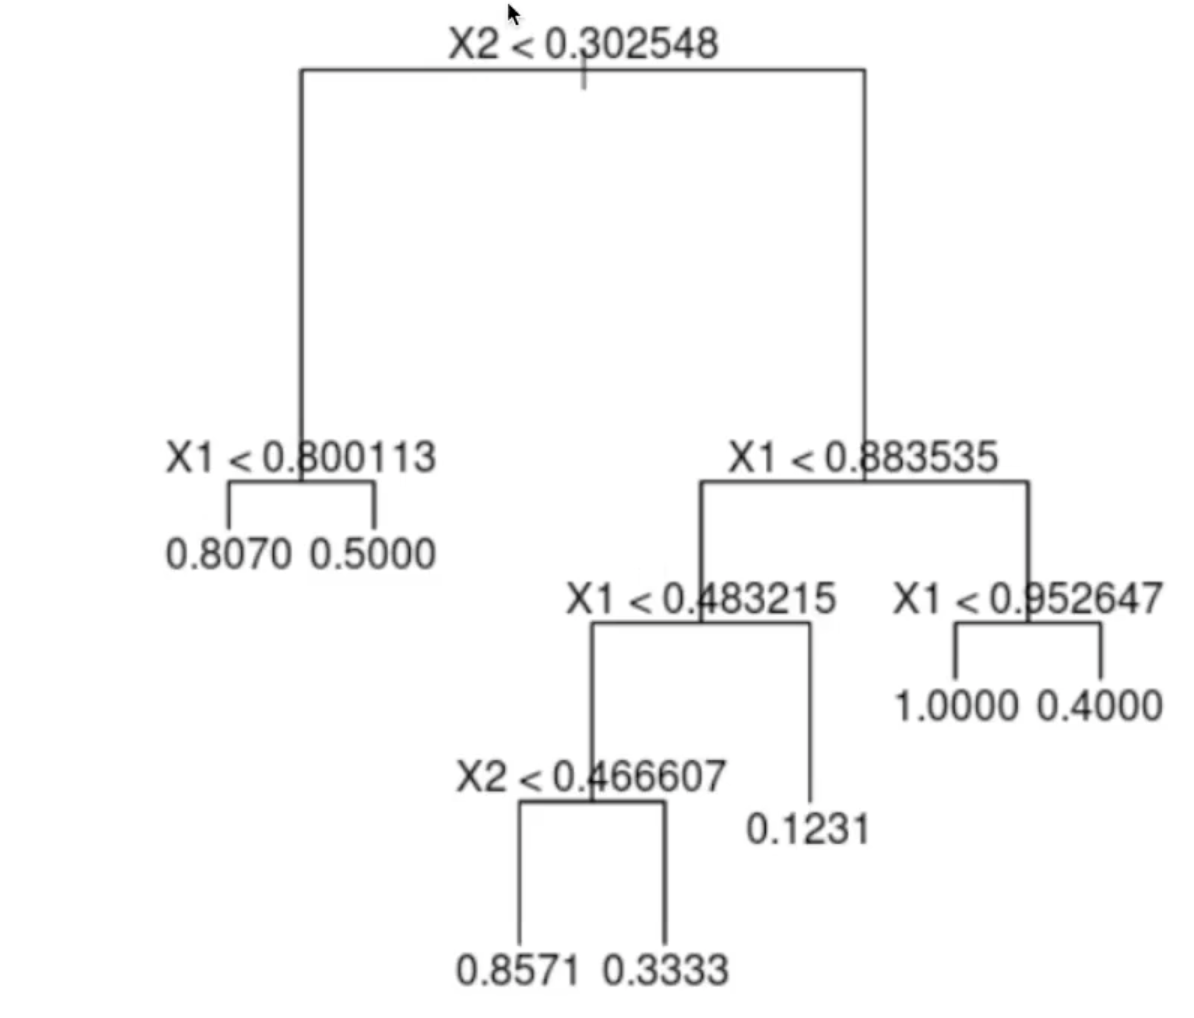

In [214]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [215]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

주어진 학습데이터에 대해 오차가 0...오차가 없이 완벽하게 학습하였음
이 모델이 선형모델보다 낫다고 말할 수 있을까? 그리고 과대적합의 가능성 또한 마찬가지로 있지 않을까>? 어떻게 알 수 있을까?

- 테스트 데이터셋을 이용한 검증(가능한 테스트데이터는 모델을 런칭 전까지 사용을 미루는게 좋다)
- 훈련 데이터셋의 일부를 검증데이터셋으로 분리해서 검증
- k겹 교차검증



### 교차검증을 사용한 평가(가능한 테스트데이터는 모델을 런칭 전까지 사용을 미루는게 좋다)

In [217]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [218]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


교차 검증이란 무엇일까? 예시를 통해 알아보도록 하자.

ex) 학습데이터를 5개로 쪼개고, 첫 번째 데이터를 제외하고 4개의 데이터로 훈련을 시킨다. 

제외한 첫 번째 데이터에 대한 RMSE를 구하여 모델의 Performance를 낸다.

다음으론 두 번째 데이터를 제외하고 나머지 4개의 데이터로 훈련을 시킨다. 제외한 두 번째 데이터에 대한 RMSE를 구하여 모델의 Performance를 낸다.

이것을 마지막 다섯 번째 데이터까지 똑같이 반복한다. 

최종적인 Performance의 값의 평균을 낸 값이 교차 검증을 통해 구할 수 있는 Error 값이다.

 

### 선형회귀모델에 대한 평가

In [219]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


10개로 데이터를 나눴기 때문에 10개의 점수가 나왔다.
이 때 평균적인 에러값을 보니 71407...의 값이 나왔다. 아까의 0.0이 나왔던 모습과는 완전히 다른 결과가 나온 것이다. 
즉, 위의 모델도 사용하지 않은 모델에 대해서는 좋지 않은 결과가 나온다는 것이다.

### 랜덤포레스트에 대한 평가



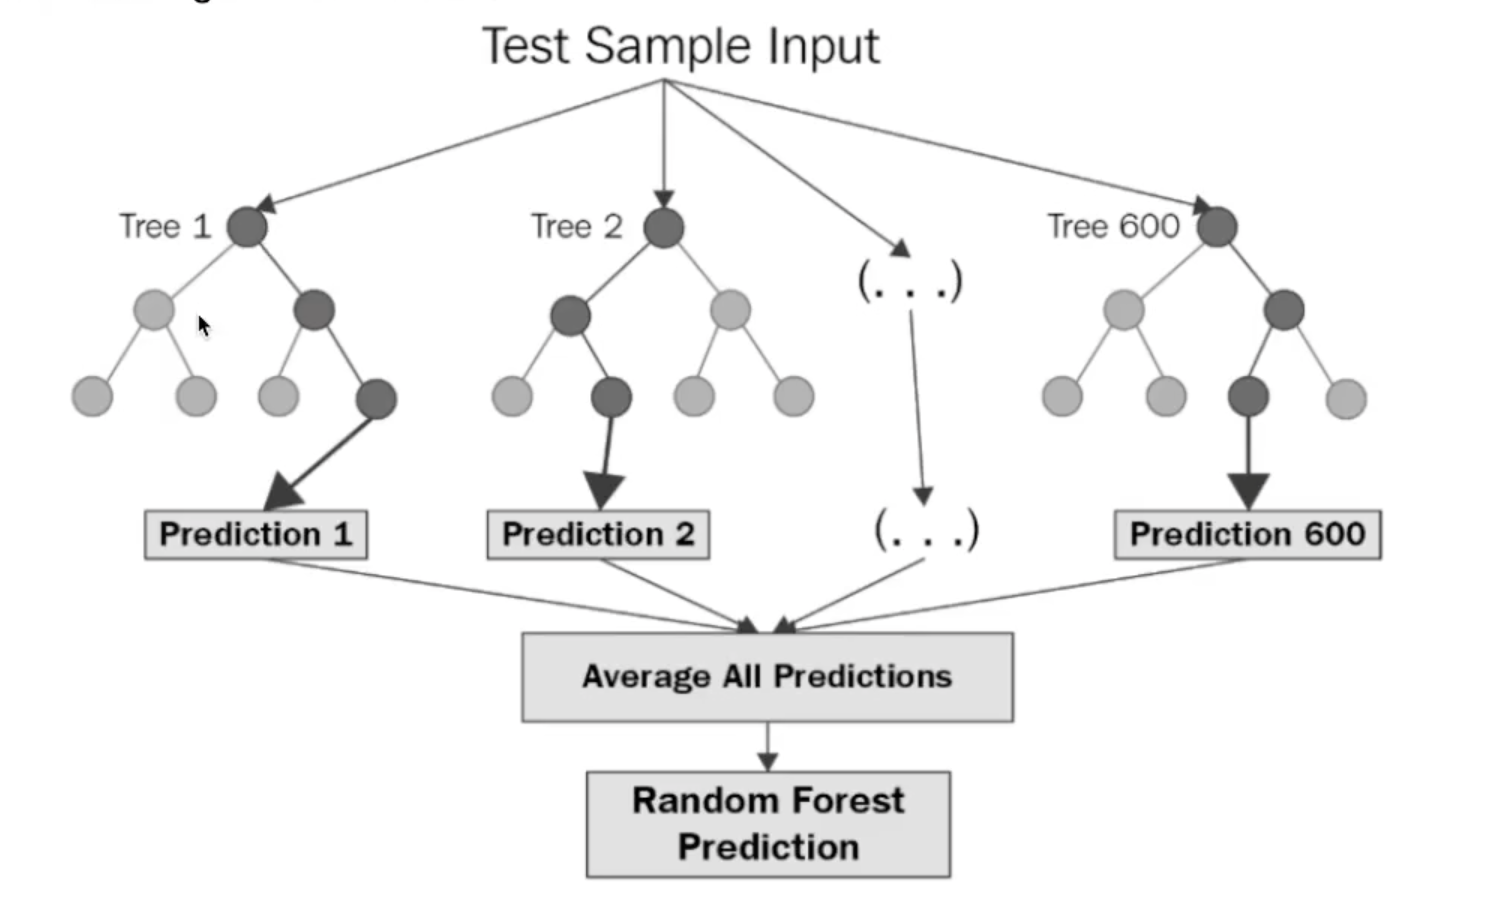

In [220]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42) # 트리개수 정해기
forest_reg.fit(housing_prepared, housing_labels)



RandomForestRegressor(random_state=42)

In [221]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

DecisionTreeRegressor 모델보다 Mean 값이 즉 에러의 평균값이 작게 나온 것을 확인할 수 있다. 오히려 선형 모델이 새로운 데이터에 대해선 더 좋은 퍼포먼스를 낼 수 있을 것이라고 예측할 수 있는 것이다.

 

그렇다고 해서 선형 모델의 에러값이 작은 값은 아니기 때문에 모델에 대한 개선이 필요할 것 같다.

이번엔 RandomForestRegressor 모델을 이용해보도록 하자.

 

RandomForestRegressor도 아까 DecisionTreeRegressor처럼 트리 구조이다. 그러나 이 모델의 다른 점은 여러 개의 트리를 사용한다는 것이다. 각 트리의 개수만큼 prediction값들이 있을 것이다. 이 prediction의 값들을 모아 평균을 내 최종적인 prediction을 내는 모델이 바로 RandomForestRegressor이다.

# 7. 모델 세부 튜닝(Fine-Tune Your Model)

모델의 종류를 선택한 후에 모델을 세부 튜닝하는 것이 필요하다. 모델 학습을 위한 최적의 하이퍼파라미터를 찾는 과정이다

# 도대체 하이퍼파라미터란 무엇인가?

### 그리드 탐색
수동으로 하이퍼마라미터 조합을 시도하는 대신 사이킷런에서 제공하는 GridsearchCV를 사용하는 것이 좋다

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    #bootstrap은 하나하나 일일이 해보는 것을 말한다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# 총 18개의 조합을 사용하게 된다.

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,##<- 5개의 교차검증
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [225]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [228]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [226]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

## 랜덤 탐색(randimized search)

하이퍼파라미터 조합 수가 큰 경우에 유리. 지정한 횟수만큼만 평가한다.


In [235]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200), #설정한 분포에 따라(1에서 200 사이)의 값을 적절하게 샘플링
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42) #n_iter = 몇 번 할지
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff2d275b250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff2d275ba30>},
                   random_state=42, scoring='neg_mean_squared_error')

In [236]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


10번을 지정해 10가지 조합이 시도된 것을 확인할 수 있다.

위와 같은 경우에는 max_features가 7이고 n_estimators가 180일 때 가장 좋은 결과가 나타난다는 것을 확인할 수 있다.



#### 특성 중요도, 에러분석
리니어?에서는 계수값을 보고 값의 대소관계를 비교해서 중요도를 살펴봤지만,다른방식도 있다.

In [238]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [239]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

# RandomForest 모델에 따면 가장 중요한 특성은 median income이고, 다음은 범주형 특성을 one-hot encoding으로 변환해준 데이터가 중요하다는 것을 알 수 있다.


[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

# 8. 테스트 데이터셋으로 최종 평가하기

In [240]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47873.26095812988

# 9. 론칭, 모니터링, 시스템 유지보수

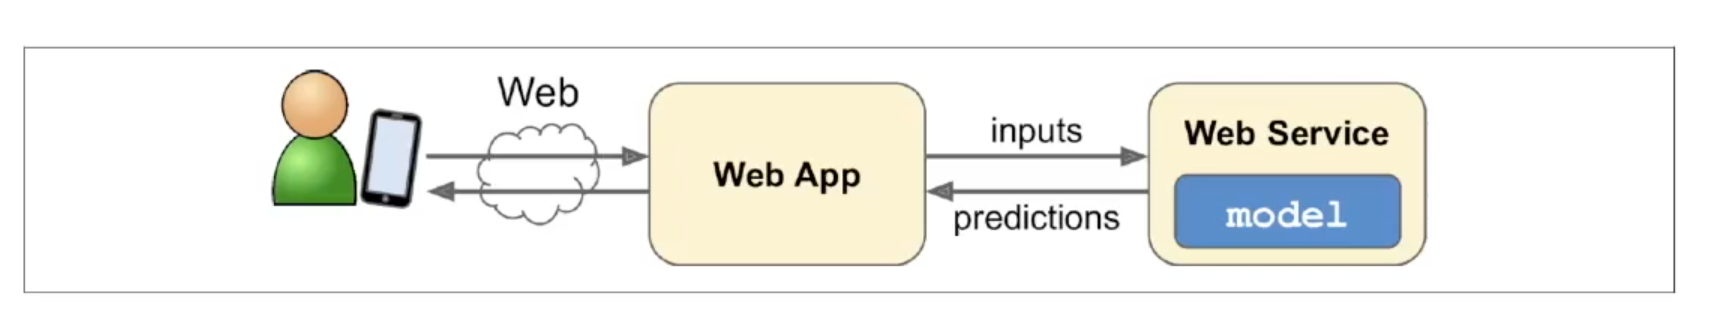

상용환경에 배포하기 위해서 데이터 전처리와 모델의 예측이 포함된 파이프라인을 만들어 저장하는 것이 좋다.

In [242]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)



array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [245]:
my_model = full_pipeline_with_predictor

In [246]:
import joblib
joblib.dump(my_model, "my_model.pkl")
#...
my_model_loaded = joblib.load("my_model.pkl")

my_model_loaded.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

# 10. 론칭후 시스템 모니터링

- 시간이 지나면 모델이 낙후되면서 성능이 저하될 수 있기 때문에 모니터링 프로그램을 미리 구축해 놓는 것이 좋다.
- 자동모니터링
ex) 추천시스템의 경우, 추천된 상품의 판매량이 줄어드는지?
- 수동모니터링
ex) 이미지 분류의 경우, 분류된 이미지들 중 일부를 전문가에게 검토시킴
- 결과가 나빠진 경우
데이터 입력의 품질이 나빠졌는지, 센서가 고장났는지, 트렌드가 변화했는지, 계절적 요인이 있는지 등 문제점에 대해 파악해야 한다.

## 유지보수

- 정기적으로 새로운 데이터(레이블)를 수집해야 한다.  
- 새로운 데이터를 테스트 데이터로, 현재의 테스트 데이터는 학습데이터로 편입한다.  
- 다시 학습후, 새로운 테스트 데이터에 기반해 현재 모델과 새 모델을 평가하고 비교한다.

# 전체프로세스에 고르게 시간을 배분해야한다.